In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
print train_images.ndim
print train_images.shape
print len(train_images)
print train_images.dtype

3
(60000, 28, 28)
60000
uint8


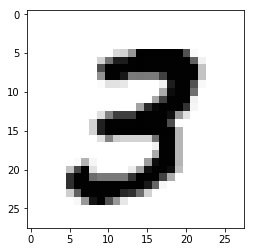

In [9]:
digit = train_images[7]

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [16]:
my_slice = train_images[10: 12, 7:-7, 7:-7]
print my_slice.shape

(2, 14, 14)


In [17]:
print my_slice

[[[  0   0   0   0 104 244 254 224 254 254 254 141   0   0]
  [  0   0   0   0   0 207 254 210 254 254 254  34   0   0]
  [  0   0   0   0   0  84 206 254 254 254 254  41   0   0]
  [  0   0   0   0   0   0  24 209 254 254 254 171   0   0]
  [  0   0   0   0   0  91 137 253 254 254 254 112   0   0]
  [  0   0   0  40 214 250 254 254 254 254 254  34   0   0]
  [  0   0   0  81 247 254 254 254 254 254 254 146   0   0]
  [  0   0   0   0 110 246 254 254 254 254 254 171   0   0]
  [  0   0   0   0   0  73  89  89  93 240 254 171   0   0]
  [  0   0   0   0   0   0   0   0   1 128 254 219  31   0]
  [  0   0   0   0   0   0   0   0   7 254 254 214  28   0]
  [  0   0   0   0   0   0   0   0 138 254 254 116   0   0]
  [177  90   0   0   0   0   0  25 240 254 254  34   0   0]
  [254 215  63  36   0  51  89 206 254 254 139   8   0   0]]

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0  31]
  [  0   0   0   0   0   0   0   0   0   0   0  68 150 239]
  [  0   0   0   0   0   0   0   0   0

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, 
                         activation='relu', 
                         input_shape=(28 * 28, )
                        )
           )
network.add(layers.Dense(10, activation='softmax'))

In [8]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy']
               )

In [9]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [10]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images,
            train_labels,
            epochs=5,
            batch_size=128
           )

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.2561 - acc: 0.9264     
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.1036 - acc: 0.9700     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0682 - acc: 0.9795     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0502 - acc: 0.9849     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0378 - acc: 0.9887     


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print 
print test_acc

 8576/10000 [========================>.....] - ETA: 0s
0.9807
